## Homework Assignment 10

**Question 1:** Select a short video with at least 3 persons and create a new movie from this video with a face tracker (each person’s face needs to be tracked by a rectangle of a different color) (50pt). See, for example, the video in: https://github.com/ageitgey/face_recognition

**Bonus:** Select a video with an animal (dog/cat/lion/...), and create a video with an animal tracker (10pt).

**My note:** I used a video of family members:

In [76]:
import base64
import imageio
import IPython

def correct_rotation(frame, rotateCode):  
    return cv2.rotate(frame, rotateCode) 

def embed_mp4(filename):
    """Embeds an mp4 file in the notebook."""
    video = open(filename,'rb').read()
    b64 = base64.b64encode(video)
    tag = '''
    <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
    Your browser does not support the video tag.
    </video>'''.format(b64.decode())

    return IPython.display.HTML(tag)

# Open the input movie file
input_movie = cv2.VideoCapture("bday_noa.mp4")

# rotateCode = check_rotation("bday_noa.mp4")

length = 500

# Load some sample pictures and learn how to recognize them.
noa_image = face_recognition.load_image_file("noa.PNG")
noa_face_encoding = face_recognition.face_encodings(noa_image)[0]

fedde_image = face_recognition.load_image_file("fedde.PNG")
fedde_face_encoding = face_recognition.face_encodings(fedde_image)[0]

carmel_image = face_recognition.load_image_file("carmel.PNG")
carmel_face_encoding = face_recognition.face_encodings(carmel_image)[0]

known_faces = [noa_face_encoding, carmel_face_encoding, fedde_face_encoding]


# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
frame_number = 0

with imageio.get_writer('bday_wish.mp4', fps=20) as video:
    for i in range(500):
        # Grab a single frame of video
        ret, frame = input_movie.read()
        frame_number += 1

        # Quit when the input video file ends
        if not ret:
            break
            
        frame = rotateCode = cv2.flip(frame, 0)

        # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
        rgb_frame = frame[:, :, ::-1]

        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_frame)
        face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.50)

            # If you had more than 2 faces, you could make this logic a lot prettier
            # but I kept it simple for the demo
            name = None
            if match[0]:
                name = "Noa"
            elif match[1]:
                name = "Carmel"
            elif match[2]:
                name = "Fedde"
            face_names.append(name)

        # Label the results
        for (top, right, bottom, left), name, color in zip(face_locations, face_names, face_colors):
            if not name:
                continue
            if name=='Noa':
                color = (204, 0, 204)
            elif name=='Fedde':
                color = (153, 255, 153)
            elif name == 'Carmel':
                color = (102, 102, 255)

            # Draw a box around the face
            cv2.rectangle(frame, (left, top), (right, bottom), color, 2)

            # Draw a label with a name below the face
            cv2.rectangle(frame, (left, bottom - 25), (right, bottom),  color, cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

        # Write the resulting image to the output video file
        print("Writing frame {} / {}".format(frame_number, length))
#         output_movie.write(frame)
        rgb_frame = frame[:, :, ::-1]
        video.append_data(rgb_frame)


Writing frame 1 / 500
Writing frame 2 / 500
Writing frame 3 / 500
Writing frame 4 / 500
Writing frame 5 / 500
Writing frame 6 / 500
Writing frame 7 / 500
Writing frame 8 / 500
Writing frame 9 / 500
Writing frame 10 / 500
Writing frame 11 / 500
Writing frame 12 / 500
Writing frame 13 / 500
Writing frame 14 / 500
Writing frame 15 / 500
Writing frame 16 / 500
Writing frame 17 / 500
Writing frame 18 / 500
Writing frame 19 / 500
Writing frame 20 / 500
Writing frame 21 / 500
Writing frame 22 / 500
Writing frame 23 / 500
Writing frame 24 / 500
Writing frame 25 / 500
Writing frame 26 / 500
Writing frame 27 / 500
Writing frame 28 / 500
Writing frame 29 / 500
Writing frame 30 / 500
Writing frame 31 / 500
Writing frame 32 / 500
Writing frame 33 / 500
Writing frame 34 / 500
Writing frame 35 / 500
Writing frame 36 / 500
Writing frame 37 / 500
Writing frame 38 / 500
Writing frame 39 / 500
Writing frame 40 / 500
Writing frame 41 / 500
Writing frame 42 / 500
Writing frame 43 / 500
Writing frame 44 / 5

Writing frame 347 / 500
Writing frame 348 / 500
Writing frame 349 / 500
Writing frame 350 / 500
Writing frame 351 / 500
Writing frame 352 / 500
Writing frame 353 / 500
Writing frame 354 / 500
Writing frame 355 / 500
Writing frame 356 / 500
Writing frame 357 / 500
Writing frame 358 / 500
Writing frame 359 / 500
Writing frame 360 / 500
Writing frame 361 / 500
Writing frame 362 / 500
Writing frame 363 / 500
Writing frame 364 / 500
Writing frame 365 / 500
Writing frame 366 / 500
Writing frame 367 / 500
Writing frame 368 / 500
Writing frame 369 / 500
Writing frame 370 / 500
Writing frame 371 / 500
Writing frame 372 / 500
Writing frame 373 / 500
Writing frame 374 / 500
Writing frame 375 / 500
Writing frame 376 / 500
Writing frame 377 / 500
Writing frame 378 / 500
Writing frame 379 / 500
Writing frame 380 / 500
Writing frame 381 / 500
Writing frame 382 / 500
Writing frame 383 / 500
Writing frame 384 / 500
Writing frame 385 / 500
Writing frame 386 / 500
Writing frame 387 / 500
Writing frame 38

In [77]:
embed_mp4('bday_wish.mp4')

**Question 2:** Select a collection of connected images. Create a graph of the links among images or objects in images (42pt). Use graph algorithms to discover interesting insights regarding the images. See, for example, [Figure 2](https://arxiv.org/pdf/1509.m00568.pdf) (8pt).

#### My notes:
I chose a dataset called lfw, which contains grey-scale images of famous people.

In [106]:
ds_path = 'lfw2'
import shutil
import os

images_path = []
for root, directories, filenames in os.walk('lfw2'):
     for filename in filenames: 
             images_path.append(os.path.join(root,filename))
print('The dataset contains {} images'.format(len(images_path)))

The dataset contains 8895 images


**My note:** In the following cell I create an sframe of the images and compute the features vector of each image using the resnet-50 pre-trained model, same as in the lecture.

In [107]:
import turicreate as tc
from turicreate.toolkits import _image_feature_extractor, _pre_trained_models
import turicreate.aggregate as agg
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

tc.config.set_num_gpus(0)
sf_lfw = tc.image_analysis.load_images("lfw2", with_path=True)

def get_images_features_vector(dataset, target, feature="image", model_name='resnet-50'):
    ptModel = _pre_trained_models.MODELS[model_name]()
    feature_extractor = _image_feature_extractor.MXFeatureExtractor(ptModel)
    extracted_features = tc.SFrame({target: dataset[target],
        '_image_features_': feature_extractor.extract_features(dataset, feature, verbose=True)})
    dataset['image_features'] = extracted_features['_image_features_']
    return dataset

sf_lfw['person'] = sf['path'].apply(lambda p: p.split('/')[2][:-9])
sf_lfw = get_images_features_vector(sf, 'person')
sf_lfw

Read 6841 images in 5.00064 secs	speed: 1368.03 file/sec

Performing feature extraction on resized images...
Completed   64/8895
Completed  128/8895
Completed  192/8895
Completed  256/8895
Completed  320/8895
Completed  384/8895
Completed  448/8895
Completed  512/8895
Completed  576/8895
Completed  640/8895
Completed  704/8895
Completed  768/8895
Completed  832/8895
Completed  896/8895
Completed  960/8895
Completed 1024/8895
Completed 1088/8895
Completed 1152/8895
Completed 1216/8895
Completed 1280/8895
Completed 1344/8895
Completed 1408/8895
Completed 1472/8895
Completed 1536/8895
Completed 1600/8895
Completed 1664/8895
Completed 1728/8895
Completed 1792/8895
Completed 1856/8895
Completed 1920/8895
Completed 1984/8895
Completed 2048/8895
Completed 2112/8895
Completed 2176/8895
Completed 2240/8895
Completed 2304/8895
Completed 2368/8895
Completed 2432/8895
Completed 2496/8895
Completed 2560/8895
Completed 2624/8895
Completed 2688/8895
Completed 2752/8895
Completed 2816/8895
Completed 2880/8895
Completed 2944/8895
Completed 3008/8895
Completed

Columns:
	path	str
	image	Image
	person	str
	image_features	array

Rows: 8895

Data:
+-------------------------------+------------------------+---------------+
|              path             |         image          |     person    |
+-------------------------------+------------------------+---------------+
| lfw2/AJ_Cook/AJ_Cook_0001.jpg | Height: 250 Width: 250 |    AJ_Cook    |
| lfw2/AJ_Lamas/AJ_Lamas_000... | Height: 250 Width: 250 |    AJ_Lamas   |
| lfw2/Aaron_Eckhart/Aaron_E... | Height: 250 Width: 250 | Aaron_Eckhart |
| lfw2/Aaron_Guiel/Aaron_Gui... | Height: 250 Width: 250 |  Aaron_Guiel  |
| lfw2/Aaron_Peirsol/Aaron_P... | Height: 250 Width: 250 | Aaron_Peirsol |
| lfw2/Aaron_Peirsol/Aaron_P... | Height: 250 Width: 250 | Aaron_Peirsol |
| lfw2/Aaron_Peirsol/Aaron_P... | Height: 250 Width: 250 | Aaron_Peirsol |
| lfw2/Aaron_Peirsol/Aaron_P... | Height: 250 Width: 250 | Aaron_Peirsol |
| lfw2/Aaron_Pena/Aaron_Pena... | Height: 250 Width: 250 |   Aaron_Pena  |
| lfw2/Aaron_Sorkin/Aaron_So... | Height: 250 Width: 250 |  Aaron_Sorkin |
+-------------------------------+------------------------+---------------+
+-------------------------------+
|         image_features        |
+-------------------------------+
| [0.002857101848348975, 0.0... |
| [0.07417299598455429, 0.0,... |
| [0.004420587792992592, 0.0... |
| [0.03599371388554573, 0.0,... |
| [0.0056306468322873116, 0.... |
| [0.0013527810806408525, 0.... |
| [0.004441276658326387, 0.0... |
| [0.10053008794784546, 0.0,... |
| [0.0057923439890146255, 0.... |
| [0.032244790345430374, 0.0... |
+-------------------------------+
[8895 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

**My note:** In the following cell I compute the similarity between the images using the features vectors and use it to create a similarity graph.

In [109]:
model = tc.image_similarity.create(sf_lfw)
similarity_graph = model.similarity_graph(k=5)

g_lfw = nx.Graph()
for v in similarity_graph.vertices['__id']:
    g_lfw.add_node(v, attr_dict={'path':sf_lfw[v]['path'], 'person': sf_lfw[v]['person']})
for e in similarity_graph.edges:
    g_lfw.add_edge(e["__src_id"], e["__dst_id"])

Performing feature extraction on resized images...
Completed   64/8895
Completed  128/8895
Completed  192/8895
Completed  256/8895
Completed  320/8895
Completed  384/8895
Completed  448/8895
Completed  512/8895
Completed  576/8895
Completed  640/8895
Completed  704/8895
Completed  768/8895
Completed  832/8895
Completed  896/8895
Completed  960/8895
Completed 1024/8895
Completed 1088/8895
Completed 1152/8895
Completed 1216/8895
Completed 1280/8895
Completed 1344/8895
Completed 1408/8895
Completed 1472/8895
Completed 1536/8895
Completed 1600/8895
Completed 1664/8895
Completed 1728/8895
Completed 1792/8895
Completed 1856/8895
Completed 1920/8895
Completed 1984/8895
Completed 2048/8895
Completed 2112/8895
Completed 2176/8895
Completed 2240/8895
Completed 2304/8895
Completed 2368/8895
Completed 2432/8895
Completed 2496/8895
Completed 2560/8895
Completed 2624/8895
Completed 2688/8895
Completed 2752/8895
Completed 2816/8895
Completed 2880/8895
Completed 2944/8895
Completed 3008/8895
Completed

Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 6207

number of reference data blocks: 64

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 888627  | 2.21119     | 75.995ms     |

| 3e+07   | 73.8769     | 3.08s        |

| 4e+07   | 100         | 5.47s        |

+---------+-------------+--------------+

**My note:** In the following cells I use some graph algorithms to find interesting information about the graph and images. I start by finding the communities in the graph:

In [5]:
c = list(greedy_modularity_communities(g_lfw))
d = {i: len(c[i]) for i in range(len(c))}
d

{0: 3209,
 1: 2946,
 2: 2011,
 3: 337,
 4: 117,
 5: 92,
 6: 78,
 7: 69,
 8: 15,
 9: 9,
 10: 5,
 11: 4,
 12: 3}

**My note:** Lets look at community 5 for example by creating a subgraph of ths community:

In [25]:
import matplotlib.image as mpimg
h = g_lfw.subgraph(c[5])
G=nx.Graph()

for n in h.nodes():
    img=mpimg.imread(h.node[n]['attr_dict']['path'])
    G.add_node(n,image= img)
for e in h.edges:
    G.add_edge(e[0], e[1])

**My note:** I analyze which object is most common in this community (other than 'person') by using imageai library and a pre-trained network:

In [55]:
from imageai.Detection import ObjectDetection
model_path = "resnet50_coco_best_v2.0.1.h5"
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath(model_path)
detector.loadModel()

total_items = []
for node in h:
    detections = detector.detectObjectsFromImage(input_image=h.node[node]['attr_dict']['path'], minimum_percentage_probability=30)
    items = [eachObject["name"] for eachObject in detections]
    total_items += items
from collections import Counter

keys = Counter(total_items).keys() 
values = Counter(total_items).values() 
dictionary = dict(zip(keys, values))
top_object = sorted(dictionary.items(), key=operator.itemgetter(1))[-2][0]
top_object

'tie'

**My note:** Lets visualize the subgraph and see if the object detection was correct:

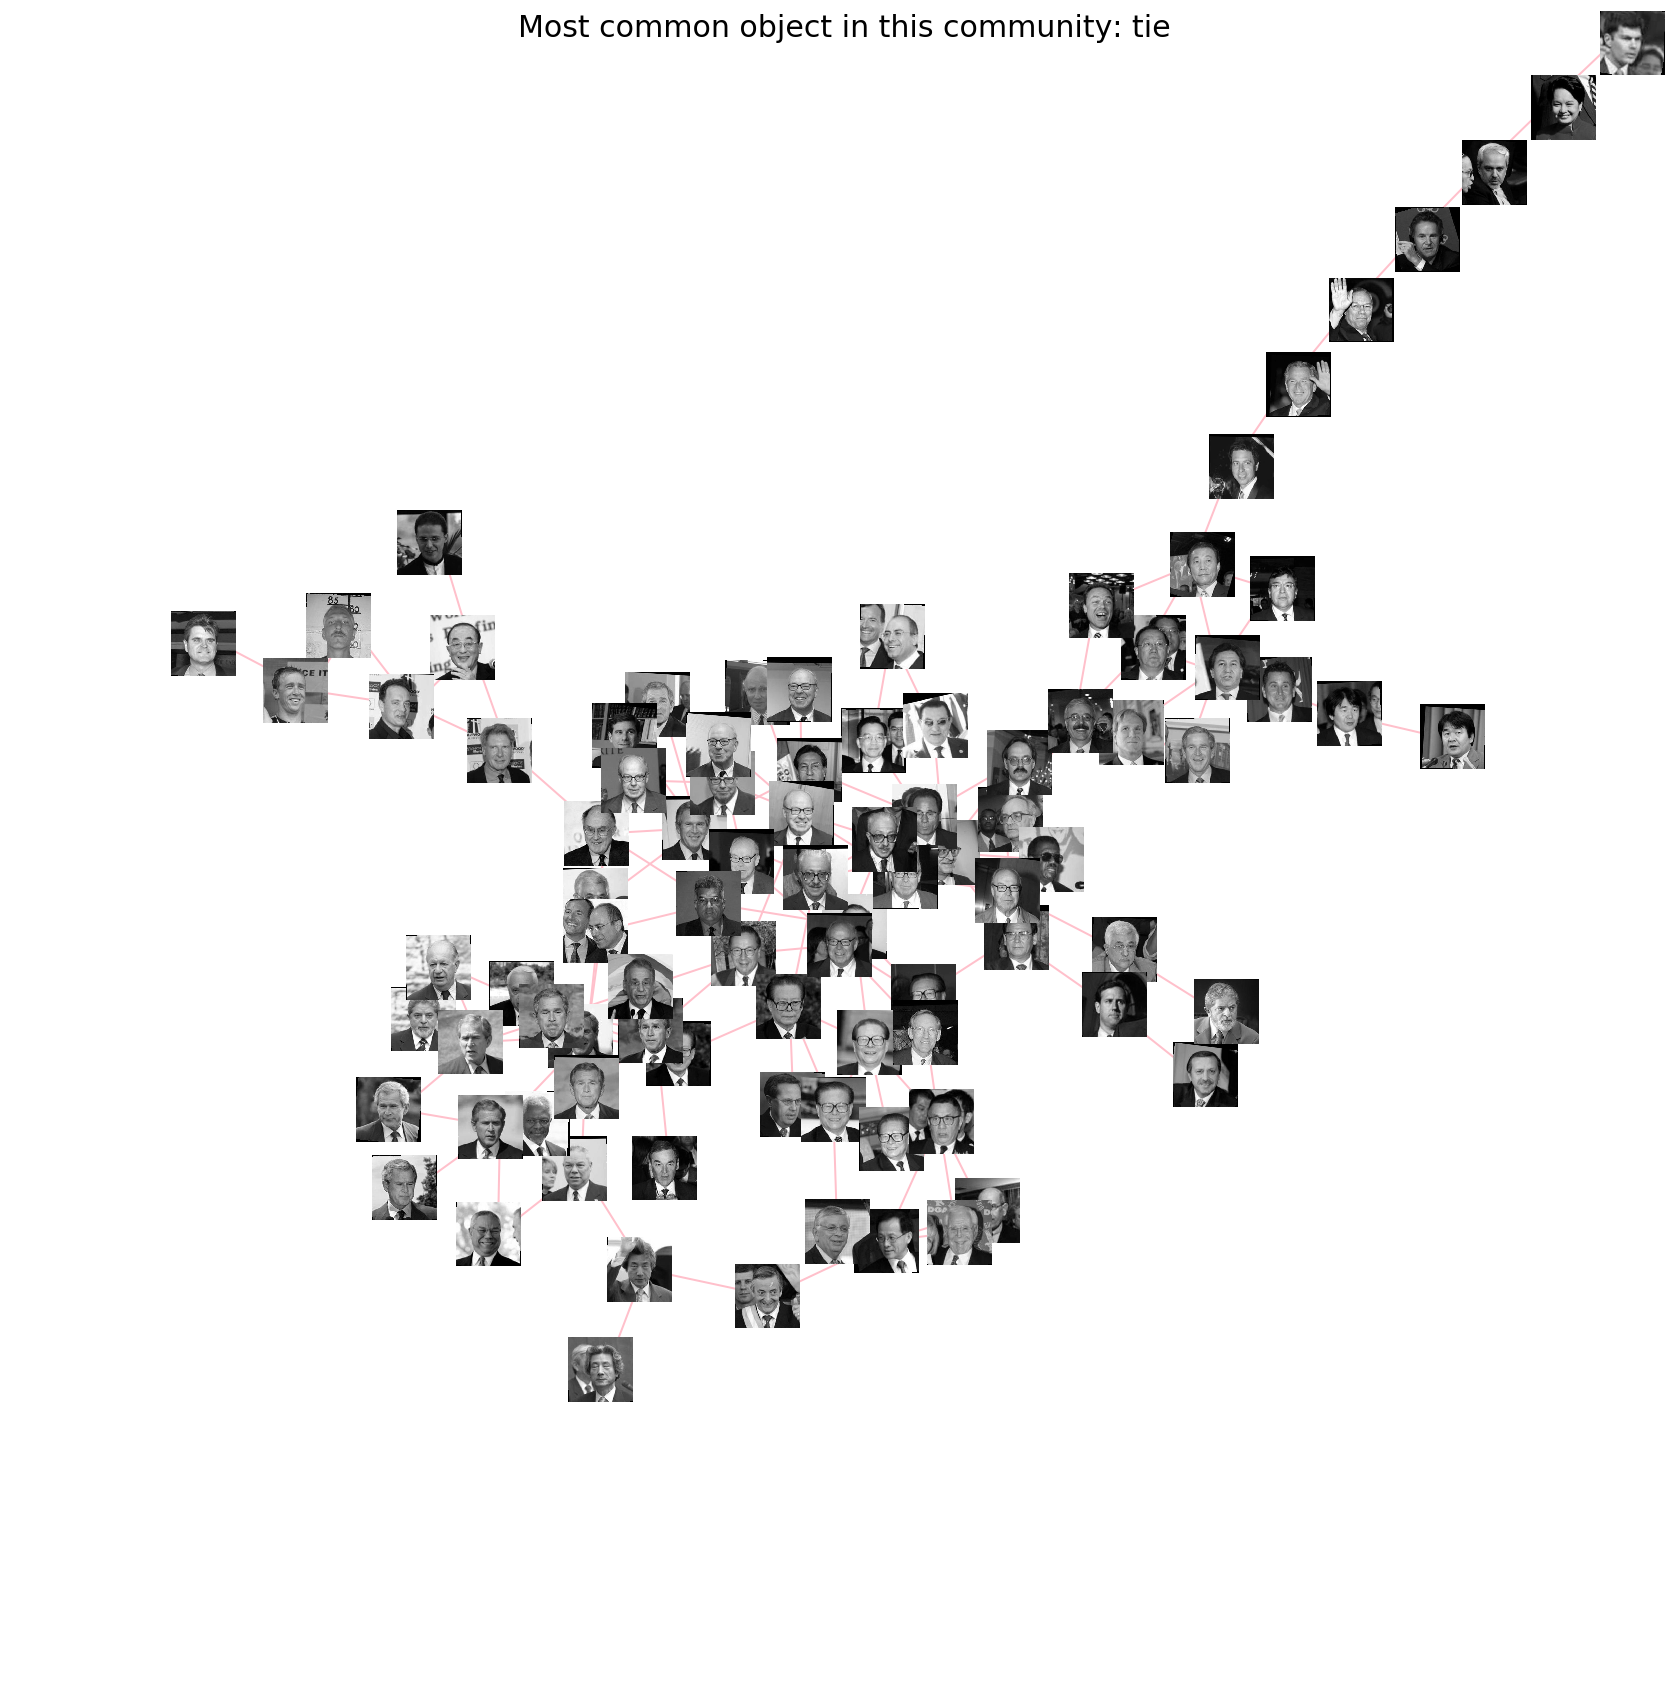

In [64]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30,30))
pos=nx.kamada_kawai_layout(G, scale=2.5)

ax=plt.subplot(111)
ax.set_aspect('equal')
nx.draw_networkx_edges(G,pos,ax=ax, edge_color='pink', width=2)

plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

piesize=0.03 # this is the image size
p2=piesize/2
for n in G:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    a.imshow(G.node[n]['image'], 'gray')
    a.axis('off')
ax.set_title('Most common object in this community: {}'.format(top_object), fontsize=30)
ax.axis('off')
plt.show()

**My note:** We can see that this community contains mostly world leaders wearing a tie. Lets see who is the person with the highest node degree in this community:

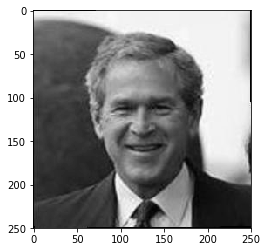

In [50]:
import operator

deg = nx.degree_centrality(h)
n = max(deg.items(), key=operator.itemgetter(1))[0]
img=mpimg.imread(h.node[n]['attr_dict']['path'])
plt.imshow(img, 'gray')

**My note:** In the following cells we perform the same process on 2 more communities:

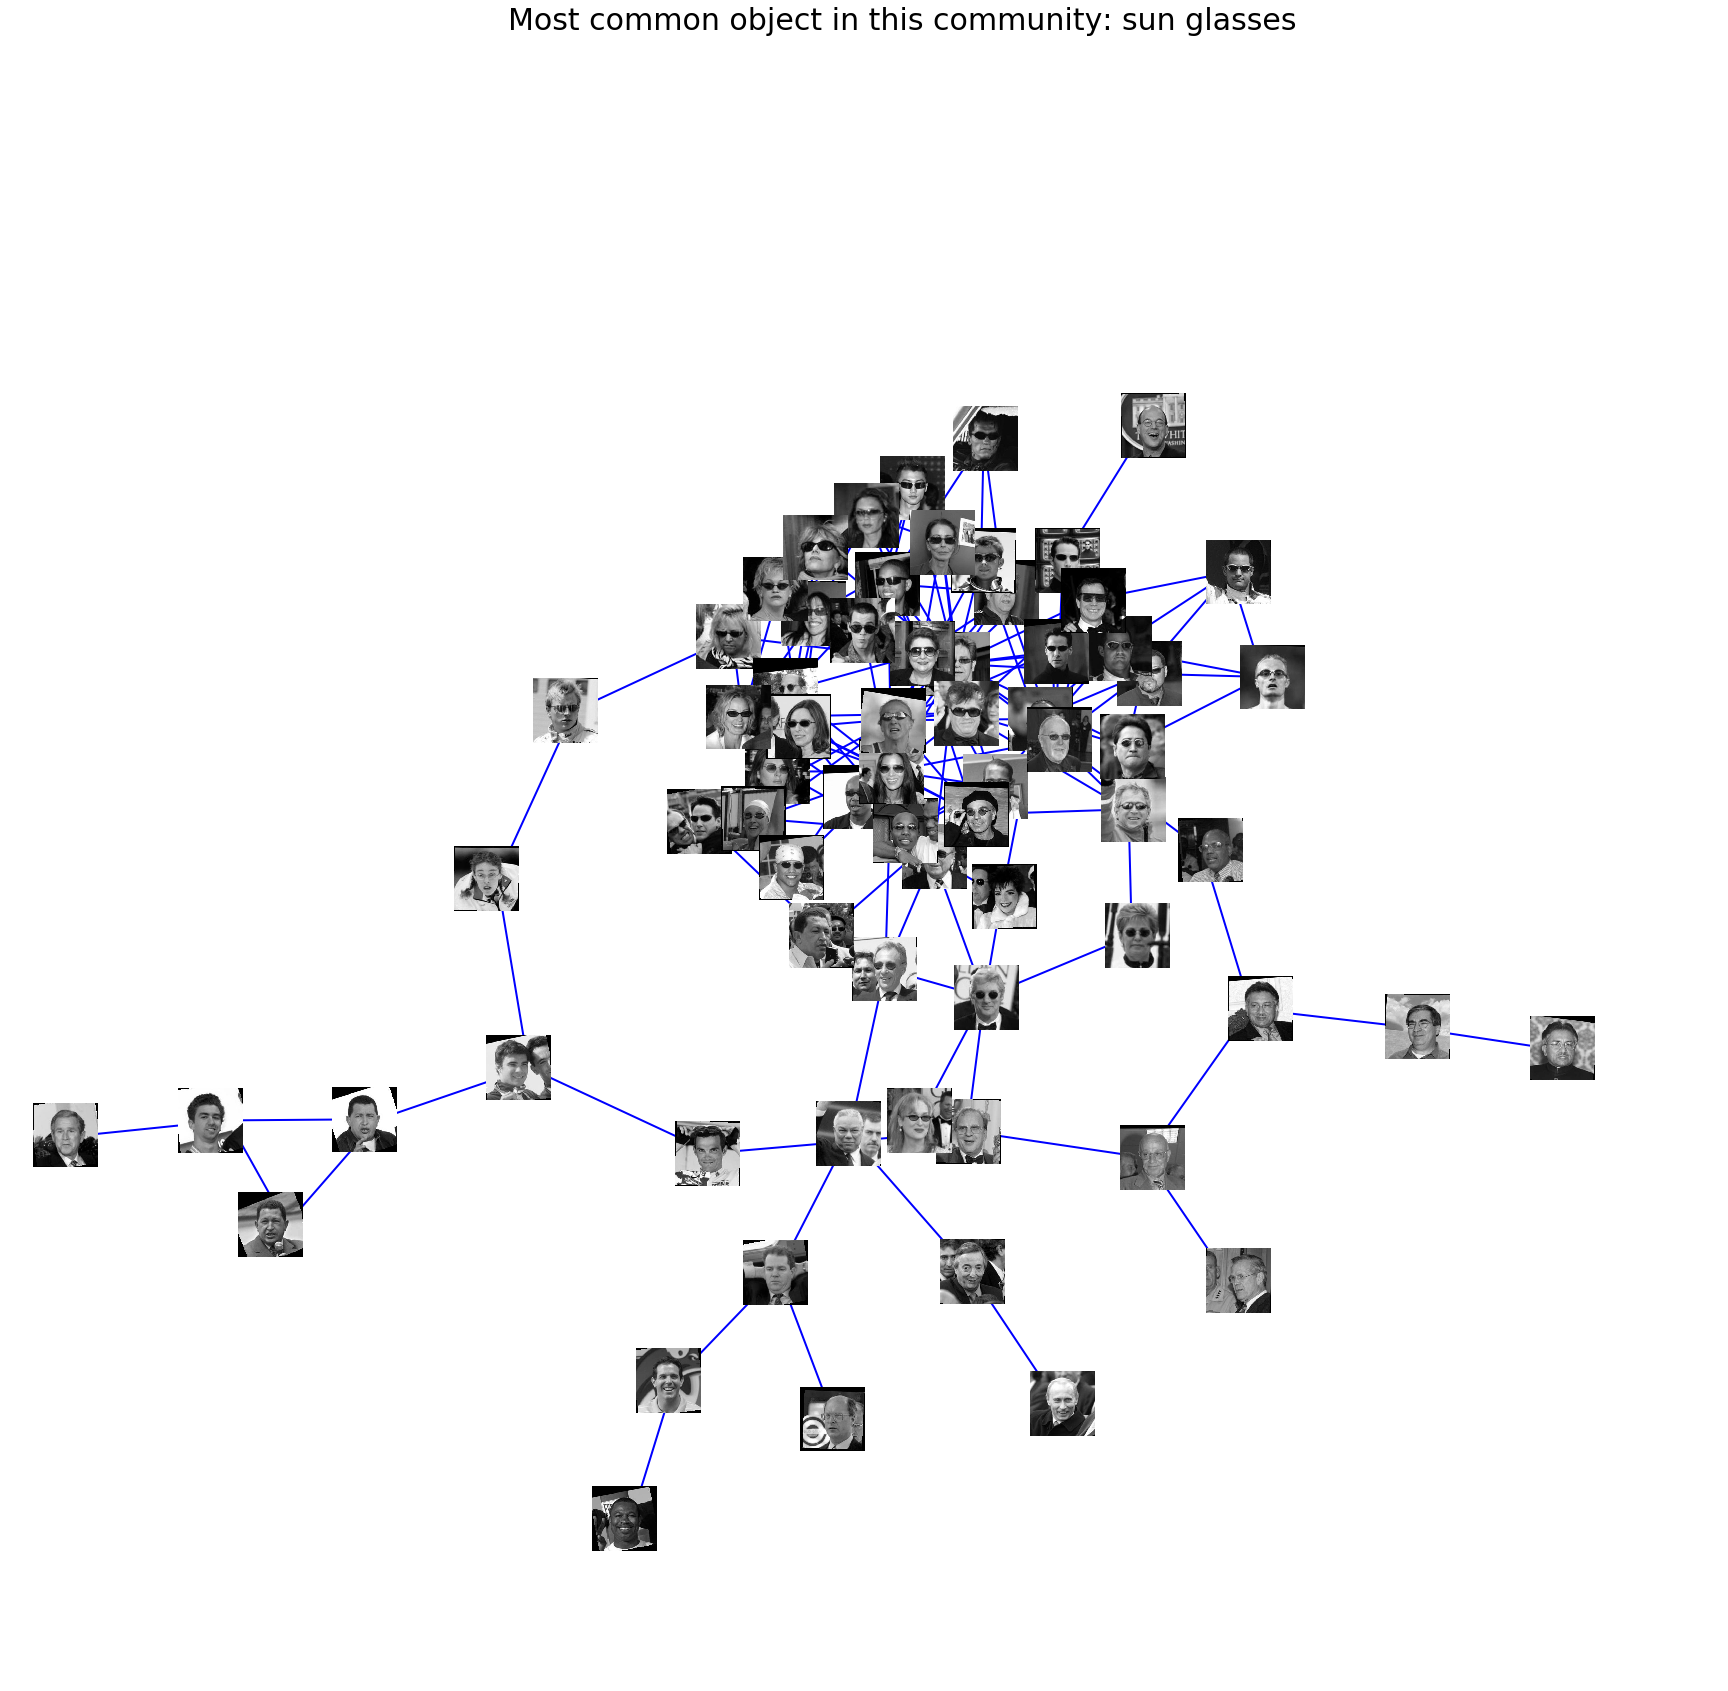

In [93]:
h = g_lfw.subgraph(c[7])
G=nx.Graph()

for n in h.nodes():
    img=mpimg.imread(h.node[n]['attr_dict']['path'])
    G.add_node(n,image= img)
for e in h.edges:
    G.add_edge(e[0], e[1])

fig=plt.figure(figsize=(30,30))
pos=nx.kamada_kawai_layout(G, scale=2.5)

ax=plt.subplot(111)
ax.set_aspect('equal')
nx.draw_networkx_edges(G,pos,ax=ax, edge_color='b', width=2)

plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

piesize=0.03 # this is the image size
p2=piesize/2
for n in G:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    a.imshow(G.node[n]['image'], 'gray')
    a.axis('off')
top_object = 'sun glasses'
ax.set_title('Most common object in this community: {}'.format(top_object), fontsize=30)

ax.axis('off')
plt.show()

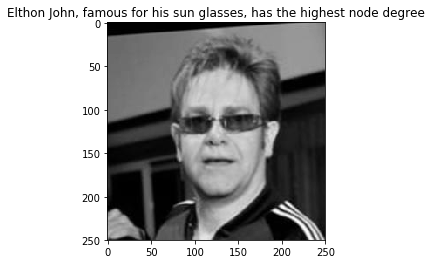

In [108]:
deg = nx.degree_centrality(h)
n = max(deg.items(), key=operator.itemgetter(1))[0]
img=mpimg.imread(h.node[n]['attr_dict']['path'])
plt.title('Elthon John, famous for his sun glasses, has the highest node degree')
plt.imshow(img, 'gray')

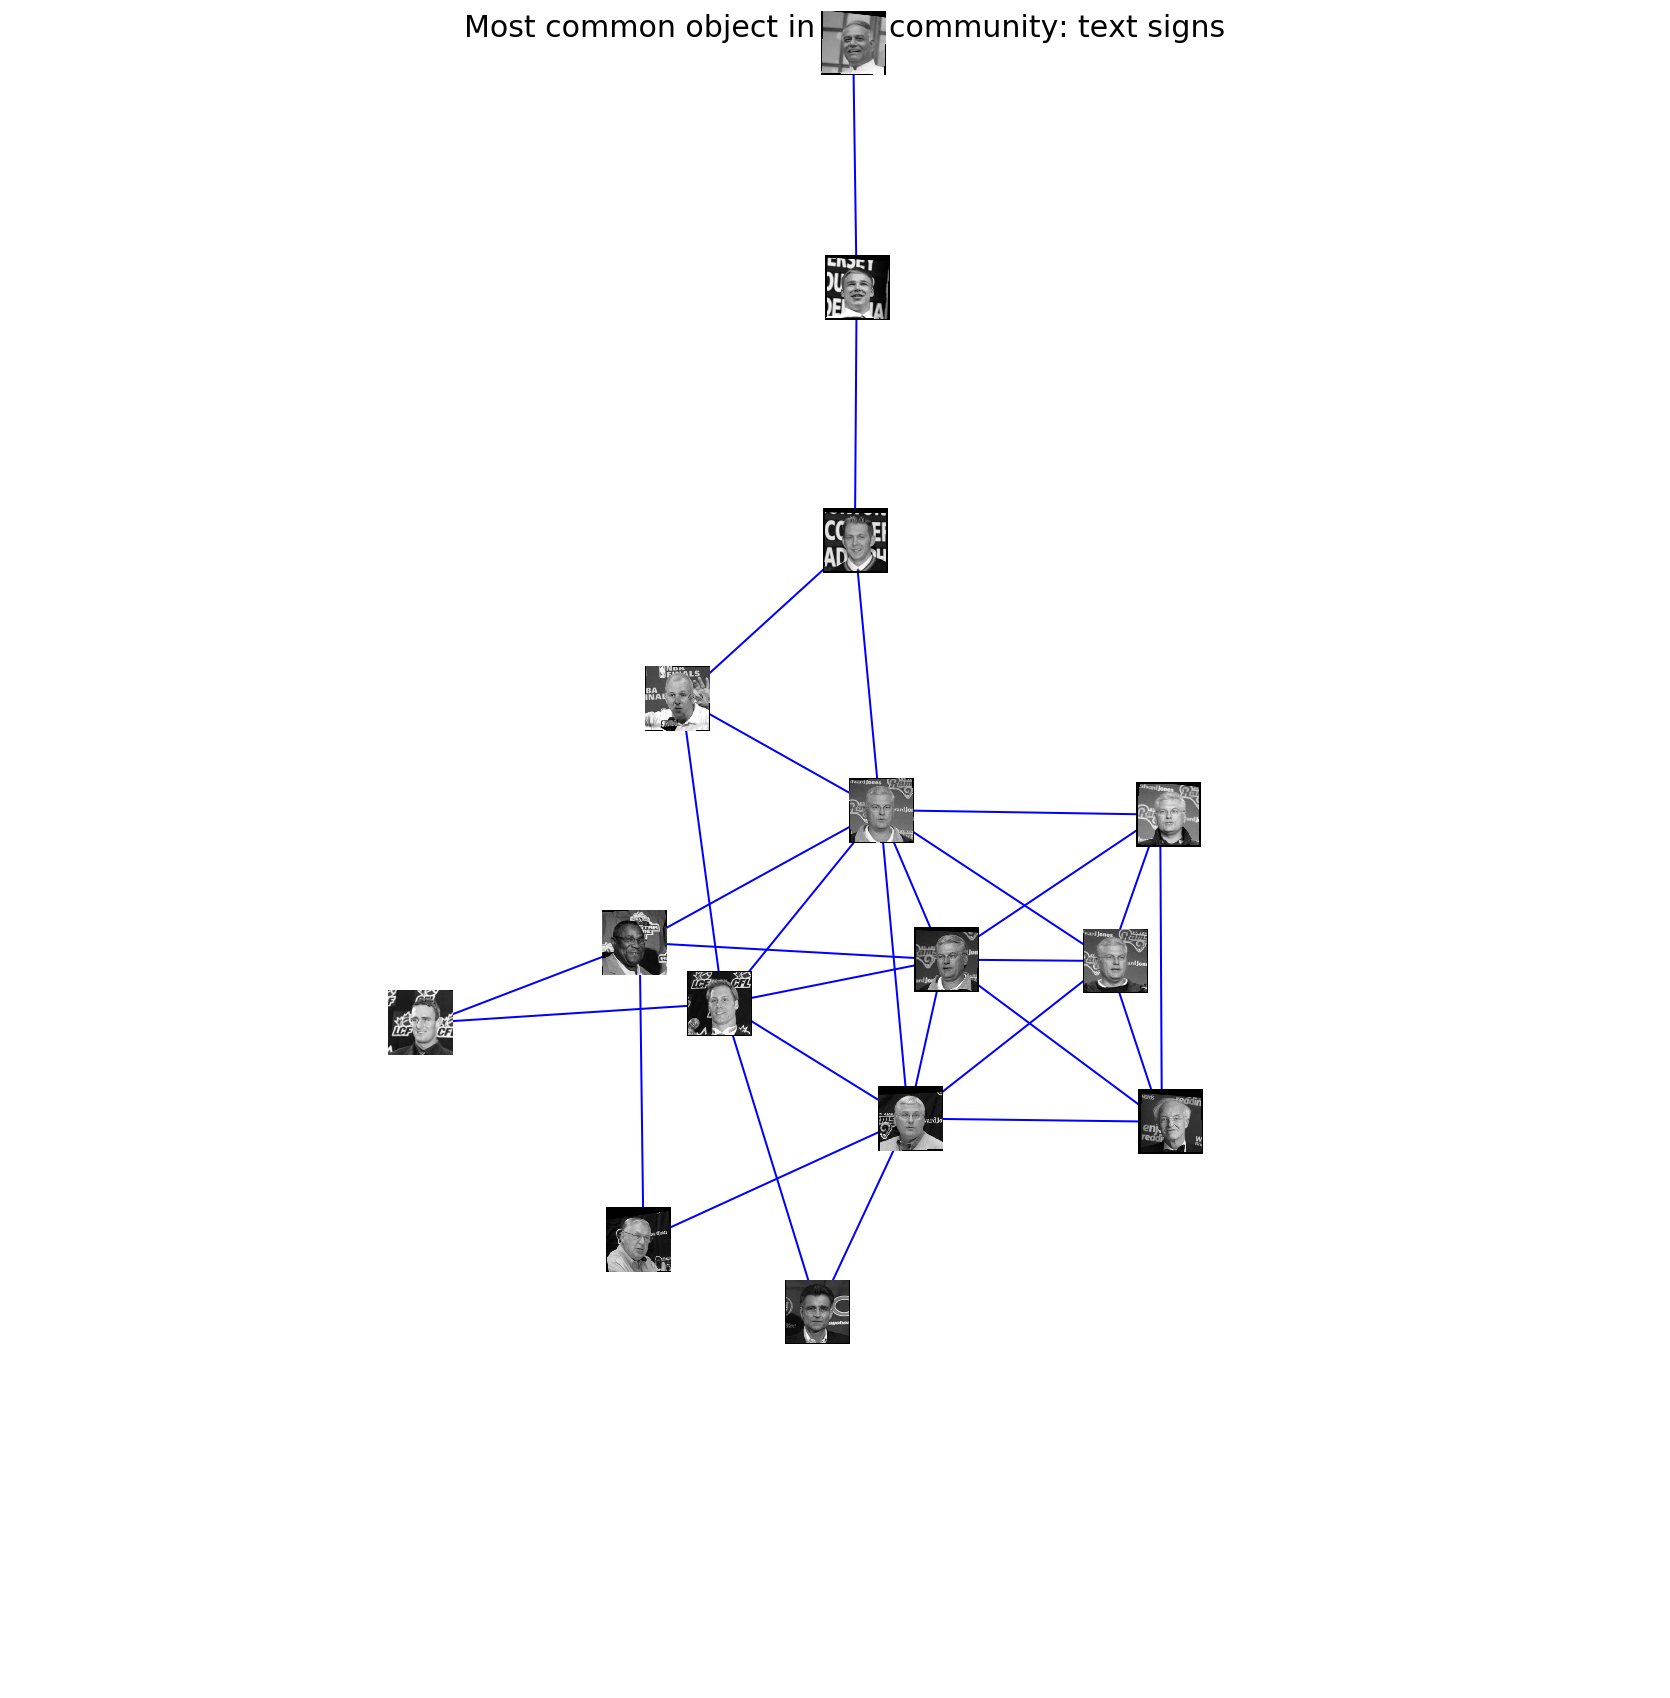

In [91]:
h = g_lfw.subgraph(c[8])
G=nx.Graph()

for n in h.nodes():
    img=mpimg.imread(h.node[n]['attr_dict']['path'])
    G.add_node(n,image= img)
for e in h.edges:
    G.add_edge(e[0], e[1])

fig=plt.figure(figsize=(30,30))
pos=nx.kamada_kawai_layout(G, scale=2.5)

ax=plt.subplot(111)
ax.set_aspect('equal')
nx.draw_networkx_edges(G,pos,ax=ax, edge_color='b', width=2)

plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

piesize=0.03 # this is the image size
p2=piesize/2
for n in G:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    a.imshow(G.node[n]['image'], 'gray')
    a.axis('off')
top_object = 'text signs'
ax.set_title('Most common object in this community: {}'.format(top_object), fontsize=30)

ax.axis('off')
plt.show()

**My note:** Lets see who is the person which is the most central, meaning he has the face with the least unique characteristics, and who is the person with the most unique face characteristics in the entire dataset:

Text(0.5,1,'This is the person which is the most central')

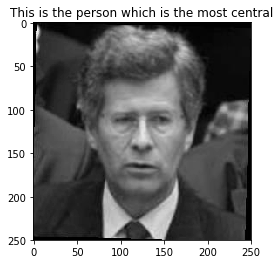

In [103]:
deg = nx.pagerank(g)
n = max(deg.items(), key=operator.itemgetter(1))[0]
img=mpimg.imread(g.node[n]['attr_dict']['path'])
plt.imshow(img, 'gray')
plt.title('This is the person which is the most central')

Text(0.5,1,'This is the person which is the least central')

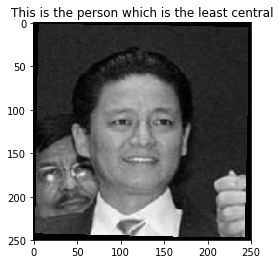

In [104]:
n = min(deg.items(), key=operator.itemgetter(1))[0]
img=mpimg.imread(g.node[n]['attr_dict']['path'])
plt.imshow(img, 'gray')
plt.title('This is the person which is the least central')